## Topic Modeling with Gensim Word2Vec

Prior to running this code, complete the these notebooks: 
* Topic_Modeling_Altmetric_Data_Loading
* Topic_Modeling_Altmetric_Data_Preprocessing


In [1]:
## General Dependencies
import re
import numpy as np
import pandas as pd
from pprint import pprint
import sys, os
import glob
from tika import parser # pip install tika
import inspect
import datetime
import pickle5 as pickle

## Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import models
#from gensim.models.coherencemodel import CoherenceModel
from gensim.models import CoherenceModel
from gensim.models import LdaModel
from gensim.models.wrappers import LdaMallet
from gensim.models import ldaseqmodel


## Preprocessing
import spacy
import nltk as nltk
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

## Plotting
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import ast

## Other Libraries
from operator import itemgetter

## ScikitLearn
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backend_bases.py:55: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  from PIL import PILLOW_VERSION
C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backend_bases.py:55: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  from PIL import PILLOW_VERSION
C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
## Load necessary data
## Open text_out_2 pickle file

file_name = "output/processing/texts_out_2.pkl"

open_file = open(file_name, "rb")
texts_out_2 = pickle.load(open_file)
open_file.close()

### Create a Word2Vec from the corpus

"The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace. That is, it detects similarities mathematically. Word2vec creates vectors that are distributed numerical representations of word features, features such as the context of individual words. It does so without human intervention.

Given enough data, usage and contexts, Word2vec can make highly accurate guesses about a word’s meaning based on past appearances. "

"We need to specify the value for the min_count parameter. A value of 2 for min_count specifies to include only those words in the Word2Vec model that appear at least twice in the corpus." 

"Word2vec training is an unsupervised task, there’s no good way to objectively evaluate the result."

#### Resources
* <https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.YKaI6-hKiUk>
* <https://stackabuse.com/implementing-word2vec-with-gensim-library-in-python/>
* <https://www.kaggle.com/c/word2vec-nlp-tutorial/overview/part-3-more-fun-with-word-vectors>
* <https://www.quora.com/How-does-word2vec-work-Can-someone-walk-through-a-specific-example/answer/Ajit-Rajasekharan>
* <https://rainynotes.net/co-occurrence-matrix-visualization/>
* <https://rare-technologies.com/word2vec-tutorial/>
* <http://ethen8181.github.io/machine-learning/deep_learning/word2vec/word2vec_detailed.html>
* <https://wiki.pathmind.com/word2vec>

In [3]:
from gensim.models import Word2Vec

model = Word2Vec(texts_out_2, min_count=10)
model.save("output/word2vec/word2vec.model")
#word2vec = Word2Vec(texts_out_2, min_count=2)

In [4]:
vocabulary = model.wv.vocab
print(vocabulary)

{'uci': <gensim.models.keyedvectors.Vocab object at 0x00000221346347B8>, 'medical': <gensim.models.keyedvectors.Vocab object at 0x0000022133B15C50>, 'center': <gensim.models.keyedvectors.Vocab object at 0x0000022136BD56D8>, 'award': <gensim.models.keyedvectors.Vocab object at 0x0000022136BD5710>, 'national': <gensim.models.keyedvectors.Vocab object at 0x0000022136BD56A0>, 'heart': <gensim.models.keyedvectors.Vocab object at 0x0000022136BD5780>, 'study': <gensim.models.keyedvectors.Vocab object at 0x0000022136BD57B8>, 'pr_newswire': <gensim.models.keyedvectors.Vocab object at 0x0000022136BD57F0>, 'december': <gensim.models.keyedvectors.Vocab object at 0x0000022136BD5828>, 'tuesday': <gensim.models.keyedvectors.Vocab object at 0x0000022136BD5860>, 'association': <gensim.models.keyedvectors.Vocab object at 0x0000022136BD5898>, 'section': <gensim.models.keyedvectors.Vocab object at 0x0000022136BD58D0>, 'financial': <gensim.models.keyedvectors.Vocab object at 0x0000022136BD5908>, 'news': <g

In [5]:
size= model.vector_size 
print(size)

100


In [6]:
test = model.wv.index2word
print(test)

['study', 'risk', 'health', 'disease', 'heart', 'research', 'blood', 'adult', 'year', 'high', 'young', 'university', 'woman', 'age', 'pressure', 'diabetes', 'may', 'usa', 'low', 'people', 'coronary', 'news', 'cardiovascular', 'artery', 'association', 'american', 'factor', 'report', 'find', 'can', 'participant', 'increase', 'researcher', 'medical', 'development', 'level', 'weight', 'national', 'healthy', 'obesity', 'percent', 'cardia', 'new', 'develop', 'time', 'associate', 'public', 'link', 'diet', 'include', 'man', 'black', 'exercise', 'journal', 'marijuana', 'service', 'show', 'lung', 'college', 'middle', 'early', 'hypertension', 'white', 'function', 'change', 'group', 'finding', 'lifestyle', 'eat', 'fitness', 'institute', 'reduce', 'patient', 'type', 'child', 'medicine', 'effect', 'professor', 'result', 'likely', 'compare', 'author', 'follow', 'life', 'accord', 'care', 'later', 'brain', 'organization', 'suggest', 'lead', 'united_states', 'smoke', 'cholesterol', 'smoking', 'publish',

In [7]:
## Finding Vectors for a Word
## We know that the Word2Vec model converts words to their corresponding vectors. 
## Let's see how we can view vector representation of any particular word.

v1 = model.wv['hostility']
print(v1)

[ 1.46297619e-01 -3.07582878e-02 -4.57125753e-01  1.27395451e-01
 -6.25459254e-01  9.66911167e-02 -2.33165659e-02  8.45092237e-02
  8.36415123e-03  1.72778498e-02 -4.43292975e-01 -1.43599883e-01
  1.70896009e-01  3.94766867e-01  1.66382104e-01 -3.10894668e-01
 -3.94696407e-02 -1.76046863e-01  1.05361510e-02  2.80327648e-01
  1.85432564e-02 -8.24970007e-02  9.74654108e-02 -3.96893099e-02
  2.55299849e-03 -1.87140778e-02 -1.78561121e-01  1.31234258e-01
  3.13951284e-01  1.32710442e-01  9.66451764e-02 -1.99099462e-02
  2.62082249e-01  4.78173852e-01  1.33243054e-01  4.76699434e-02
 -5.95183000e-02 -1.39529169e-01 -4.00481634e-02 -2.19482467e-01
  4.97452803e-02  2.82122403e-01 -2.98338924e-02 -1.18800156e-01
 -5.67123741e-02  1.01470754e-01  1.32070646e-01  8.11748207e-02
  5.28137386e-02 -2.60433495e-01 -7.36721680e-02 -3.37196916e-01
  4.07101214e-02 -1.04349263e-01  4.57960665e-01 -8.15737396e-02
  4.72122654e-02 -1.02812402e-01 -1.12026706e-01  5.03018647e-02
  1.23812057e-01 -2.89557

In [8]:
## Finding Similar Words
## Earlier we said that contextual information of the words is not lost using Word2Vec approach. 
##We can verify this by finding all the words similar to the word "[word here]".

sim_words = model.wv.most_similar('hostility')
print(sim_words)

[('dysfunction', 0.9365208148956299), ('abnormality', 0.9178776144981384), ('left_ventricle', 0.9048585891723633), ('normal_range', 0.9036738872528076), ('accumulate', 0.8962110280990601), ('sign', 0.8941534757614136), ('mid_life', 0.8839269280433655), ('worse_cognitive', 0.8782358169555664), ('adverse', 0.8750711679458618), ('common', 0.8747499585151672)]


In [9]:
## After the model has learned the word vector for each valid word in our corpus, 
## we can use them to look up related words and phrases (words that have similar semantic meaning) 
## for a given term of interest by comparing distances between the vectors 
## using distance metric such as cosine distance.

sim_words_positive = model.wv.most_similar(positive=['hostility'], topn=5)
print(sim_words_positive)

[('dysfunction', 0.9365208148956299), ('abnormality', 0.9178776144981384), ('left_ventricle', 0.9048585891723633), ('normal_range', 0.9036738872528076), ('accumulate', 0.8962110280990601)]


In [14]:
sim_words_both = model.wv.most_similar(positive=['woman', 'child'], negative=['man'], topn=5)
print(sim_words_both)

[('breastfeed', 0.7567437291145325), ('trend', 0.7208212018013), ('pregnancy_complication', 0.7173998355865479), ('physical', 0.7172434329986572), ('chronic_diseases', 0.7102375030517578)]


In [11]:
## Print and save the word vectors
word_vectors = model.wv.syn0
print(word_vectors)

##word_vectors.save("oputput/word2vec/word2vec.wordvectors")

[[-0.39038265  0.01911648 -0.1840759  ... -0.704495    0.2246909
   0.10886248]
 [ 0.44369447  0.88022035 -2.1637142  ... -0.8919034   0.63714343
   0.18708616]
 [ 1.216387   -0.9566313   0.42034194 ...  0.19806543  1.3659973
  -0.01843181]
 ...
 [ 0.04451245 -0.02193986 -0.05575843 ... -0.04585969  0.08813334
  -0.02924127]
 [ 0.07111296 -0.10063177  0.06060824 ... -0.0209756  -0.01031191
  -0.08307584]
 [ 0.08670011 -0.0799055   0.01801641 ... -0.05415513  0.13251783
  -0.01970069]]


C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


In [15]:
# Create a Word / Index dictionary                                                            
word_centroid_map = dict(zip( model.wv.index2word, idx ))
print(word_centroid_map)

NameError: name 'idx' is not defined

In [17]:
# obtain the learned word vectors (.wv.vectors)
# and the vocabulary/word that corresponds to each word vector
word_vectors_pd = pd.DataFrame(model.wv.vectors, index=model.wv.index2word)
print('word vector dimension: ', word_vectors.shape)
word_vectors_pd.head()


# import pandas as pd
# names = cv.get_feature_names() # This are the entity names (i.e. keywords)
# df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
# df.to_csv('to gephi.csv', sep = ',')

word vector dimension:  (3248, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
study,-0.390383,0.019116,-0.184076,-0.056008,-1.810993,-0.870719,0.442774,-0.408274,-0.277168,0.018050,...,-0.601251,-1.066854,-0.156953,-0.321446,0.007890,-0.328912,-0.121698,-0.704495,0.224691,0.108862
risk,0.443694,0.880220,-2.163714,1.065525,-1.087227,0.873917,0.067598,0.480774,0.038992,0.060943,...,0.460379,-1.602724,-0.797868,0.759666,-0.740369,0.330254,-1.127180,-0.891903,0.637143,0.187086
health,1.216387,-0.956631,0.420342,-0.039996,-0.325267,-0.411049,0.344886,-0.283746,0.083463,-0.360589,...,-0.428160,-0.453840,-0.144172,-0.173604,-0.264132,-0.190721,-0.331320,0.198065,1.365997,-0.018432
disease,0.814980,-0.034910,-1.581196,0.645823,-0.295479,0.935811,0.215861,0.375942,0.131721,-0.768624,...,0.430631,-1.793443,-1.506502,0.085056,-1.048545,0.367275,-0.959139,-0.341392,1.219781,0.071100
heart,0.117178,0.749481,-1.457457,0.603068,-1.600695,0.702852,-0.426522,0.641482,0.228345,0.100967,...,-0.056963,-1.103472,-1.437336,-1.010275,-1.521604,0.561161,-0.124987,-0.138617,1.322759,0.662047


In [78]:
test = word2vec.wv.syn0
print(test)

[[ 8.0805707e-01 -1.0044325e-01  1.1308928e+00 ... -5.8057183e-01
  -3.4397838e-01 -3.1092286e-01]
 [ 1.4444435e-01 -5.5907756e-01  1.3060174e+00 ...  1.4706305e+00
   4.0874961e-01 -7.3764926e-01]
 [ 1.6355550e+00 -6.0882312e-01  1.1034353e+00 ... -1.2845525e-01
   1.5645009e+00  5.2848381e-01]
 ...
 [ 4.9391635e-02 -2.6281739e-02  1.9682683e-02 ...  4.0053617e-02
   1.4686332e-02  2.4895573e-02]
 [ 4.7097649e-02 -2.7001910e-02  1.6216248e-02 ...  3.8046990e-02
   2.3175968e-02  2.7198298e-02]
 [-1.2406104e-02 -6.5432545e-03 -1.9949871e-04 ...  1.1954333e-02
  -1.5900018e-02 -3.1385303e-02]]


C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [66]:
vector_dict = dict({})
for idx, key in enumerate(model.wv.vocab):
    vector_dict[key] = model.wv[key]
    # Or my_dict[key] = model.wv.get_vector(key)
    # Or my_dict[key] = model.wv.word_vec(key, use_norm=False)

print(vector_dict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\keg827\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use se

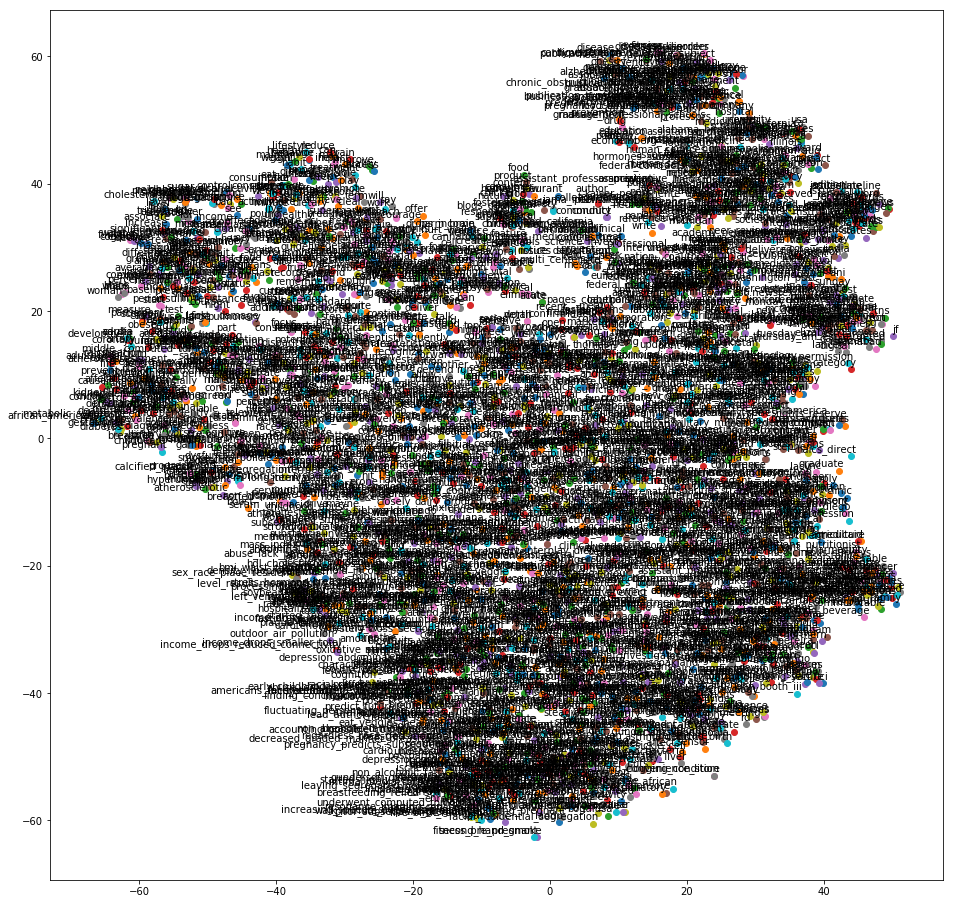

In [81]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)


## Resources
## https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

### Clustering Analysis: K-Means

"Word2Vec creates clusters of semantically related words, so another possible approach is to exploit the similarity of words within a cluster. Grouping vectors in this way is known as "vector quantization." To accomplish this, we first need to find the centers of the word clusters, which we can do by using a clustering algorithm such as K-Means.

In K-Means, the one parameter we need to set is "K," or the number of clusters. How should we decide how many clusters to create? Trial and error suggested that small clusters, with an average of only 5 words or so per cluster, gave better results than large clusters with many words. Clustering code is given below. We use scikit-learn to perform our K-Means.

K-Means clustering with large K can be very slow; the following code took more than 40 minutes on my computer. Below, we set a timer around the K-Means function to see how long it takes."

#### Text from: 
* <https://www.kaggle.com/c/word2vec-nlp-tutorial/overview/part-3-more-fun-with-word-vectors>